# XCEPTION

## Opening Remarks

After a bit of time trying to create confusion matrix's based on my model I started running into some problems and to work around those issues I had to recreate the structure of my pipeline to include generators and this was a learning journey for sure. XCEPTION is another premade model that I am hoiping to use to gain a couple more points in my accuracy model.

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.metrics import classification_report,confusion_matrix
from tensorflow import keras

import tensorflow as tf
from tensorflow.keras import datasets, layers, models, Sequential
from tensorflow.keras import models, layers, optimizers, regularizers
# from tensorflow.keras.models import Sequential
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout


import cv2
import os

from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# using ImageDataGenerator to rescale all images 
train_datagen = ImageDataGenerator(rescale=1./256)
val_datagen = ImageDataGenerator(rescale=1./256)
test_datagen = ImageDataGenerator(rescale=1./256)

In [4]:
train = tf.keras.utils.image_dataset_from_directory('/content/drive/MyDrive/Data_NEW/train')
test = tf.keras.utils.image_dataset_from_directory('/content/drive/MyDrive/Data_NEW/test')
val = tf.keras.utils.image_dataset_from_directory('/content/drive/MyDrive/Data_NEW/val')

Found 19862 files belonging to 2 classes.
Found 6208 files belonging to 2 classes.
Found 4965 files belonging to 2 classes.


In [5]:
train_generator = val_datagen.flow_from_directory('/content/drive/MyDrive/Data_NEW/train',
                                                        target_size=(256, 256),
                                                        batch_size=32,
                                                        color_mode='rgb',
                                                        class_mode='binary')
validation_generator = val_datagen.flow_from_directory('/content/drive/MyDrive/Data_NEW/val',
                                                        target_size=(256, 256),
                                                        batch_size=10,
                                                        color_mode='rgb',
                                                        class_mode='binary')
test_generator = test_datagen.flow_from_directory('/content/drive/MyDrive/Data_NEW/test',
                                                  target_size=(256, 256),
                                                  batch_size=1,
                                                  color_mode='rgb',
                                                  class_mode='binary')

Found 19862 images belonging to 2 classes.
Found 4965 images belonging to 2 classes.
Found 6208 images belonging to 2 classes.


In [6]:
test_data, test_labels = next (test_generator)
train_data, train_labels = next (train_generator)
val_data, val_labels = next (validation_generator)

In [7]:
xception = tf.keras.applications.Xception(
                                            include_top=False,     
                                            weights='imagenet',          
                                            classifier_activation='sigmoid',     
                                            input_shape=(256, 256, 3), )

83697664/83683744 [==============================] - 2s 0us/step


In [8]:
model = tf.keras.Sequential([
xception,
layers.Flatten(),
layers.Dense(1, activation='sigmoid')
])


model.summary()

model.compile(optimizer=optimizers.Adam(learning_rate=0.00001),
              loss=tf.losses.BinaryCrossentropy(),
              metrics='accuracy')

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 xception (Functional)       (None, 8, 8, 2048)        20861480  
                                                                 
 flatten (Flatten)           (None, 131072)            0         
                                                                 
 dense (Dense)               (None, 1)                 131073    
                                                                 
Total params: 20,992,553
Trainable params: 20,938,025
Non-trainable params: 54,528
_________________________________________________________________


In [13]:
history = model.fit(train_generator,
                    steps_per_epoch=100,
                    epochs=5,  # Number of epochs
                    validation_data=validation_generator,
                    )

Epoch 1/5
100/100 [==============================] - 614s 6s/step - loss: 0.0729 - accuracy: 0.9753 - val_loss: 0.0801 - val_accuracy: 0.9734
Epoch 2/5
100/100 [==============================] - 532s 5s/step - loss: 0.0810 - accuracy: 0.9727 - val_loss: 0.0750 - val_accuracy: 0.9736
Epoch 3/5
100/100 [==============================] - 457s 5s/step - loss: 0.0643 - accuracy: 0.9825 - val_loss: 0.0614 - val_accuracy: 0.9793
Epoch 4/5
100/100 [==============================] - 384s 4s/step - loss: 0.0431 - accuracy: 0.9891 - val_loss: 0.0539 - val_accuracy: 0.9821
Epoch 5/5
100/100 [==============================] - 316s 3s/step - loss: 0.0352 - accuracy: 0.9897 - val_loss: 0.0503 - val_accuracy: 0.9839


In [14]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [15]:
# Get precision, recall, and accuracy for test batch set
for batch in test.as_numpy_iterator(): 
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

In [16]:
print(f'Precision: {pre.result()}, Recall: {re.result()}, Accuracy: {acc.result()}')

Precision: 0.5087265968322754, Recall: 0.9958873987197876, Accuracy: 0.5082151889801025


# Results of VGG

VGG:Precision: 0.9582728743553162, Recall: 0.835495114326477, Accuracy: 0.8977126479148865 (2 EPOCHS)
<br>VGG:Precision: Precision: 0.9752442836761475, Recall: 0.9471685886383057, Accuracy: 0.9608569741249084
(6 EPOCHS)
<br>VGG:Precision: Precision: 0.9539697170257568, Recall: 0.9769060611724854, Accuracy: 0.9642397165298462
(8 EPOCHS)
<br>VGG:Precision: Precision: 0.9901024103164673, Recall: 0.9177475571632385, Accuracy: 0.953447163105011
(10 EPOCHS)
<br> VGG_COMP: Precision: 0.9824896454811096, Recall: 0.9762733578681946, Accuracy: 0.9790592789649963 (7 EPOCHS)
<br> VGG (REVAMP): Precision: 0.6386809349060059, Recall: 0.9987345933914185, Accuracy: 0.7116623520851135 (7 EPOCHS)
<br> VGG (REVAMP): Precision: 0.7617433667182922, Recall: 0.9952546954154968, Accuracy: 0.8390786051750183 (10 EPOCHS)
<br>Precision: 0.7409582138061523, Recall: 0.9981018900871277, Accuracy: 0.8213595151901245 - 11 EPOCHS
<br>Precision: 0.7332867383956909, Recall: 0.9958873987197876, Accuracy: 0.813466489315033 - 12 EPOCHS
<br>XCEPTION: Precision: 0.5087947845458984, Recall: 0.9882948398590088, Accuracy: 0.5082151889801025 - 5
<br>XCEPTION: Precision: 0.5087265968322754, Recall: 0.9958873987197876, Accuracy: 0.5082151889801025 - 10

# Take Aways

I thought that XCEPTION would do a little better than the VGG but that doesn't seem to be the case? I only base this off the fact that Stanford used it in their deepfake model.

# Create Confusion Matrix

In [17]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [18]:
# Function to show confusion matrix 
##from sklearn
def plot_confusion_matrix(cm, classes,
                        normalize=False,
                        title='Confusion matrix',
                        cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [19]:
validation_generator = val_datagen.flow_from_directory('/content/drive/MyDrive/Data_NEW/val',
                                                        target_size=(256, 256),
                                                        batch_size=1000,
                                                        color_mode='rgb',
                                                        class_mode='binary')

Found 4965 images belonging to 2 classes.


In [20]:
val_data, val_labels = next (validation_generator)

In [21]:
y_pred = (model.predict(val_data) > 0.5).astype("int32")
cm = confusion_matrix(y_true= val_labels, y_pred=y_pred)  

Confusion matrix, without normalization
[[492   5]
 [ 12 491]]


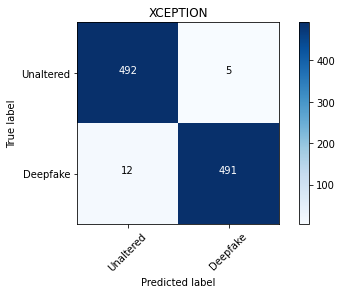

In [22]:
import itertools
cm_labels = ['Unaltered','Deepfake']
plot_confusion_matrix(cm=cm, classes=cm_labels, title='XCEPTION');